<!-- dom:TITLE: Extracellular potentials from single-neuron simulation -->
# Extracellular potentials from single-neuron simulation

Date: **Jun 23, 2017**

<!-- TOC: on -->

In these exercises we want to study different neuron morphologies,
and get a better understanding of the following concepts:

* membrane potential

* extracellular potentials

with emphasis on the effect of synaptic weight and placement.
Till now we have used NEURON for simulation of neural activity. In this exercise
we want to investigate how the neural activity gives rise to measurable
electric potentials in the space outside of the neuron. For this purpose we
introduce a python package called LFPy, running NEURON under the hood.
Documentation can be found here: [http://lfpy.github.io/](http://lfpy.github.io/) (NB: some updates are not documented.)



<!-- --- begin exercise --- -->

## Exercise 1: Simulation of pyramidal cell

Instead of building the morphology yourself, you will in this example work with
anatomically reconstructed neuron models, which you can find in the cells-folder.
We start by simulating the Mainen and Sejnowski neuron model,
which is a layer-5 pyramidal cell from cat visual cortex. For more details, see
[Mainen and Sejnowski 1996](https://www.ncbi.nlm.nih.gov/pubmed/8684467).


**a)**
**Plot neuron morphology and somatic membrane potential**
<linebreak> Run the code-cells below to simulate the cell, show
the neuron morphology, mark the synapse location with a red dot and plot the
somatic membrane potential.

In [1]:
%matplotlib inline

import LFPy
import numpy as np
from pylab import *
from matplotlib.collections import PolyCollection
from ipywidgets import widgets, fixed
from neuron import h

/Applications/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [7]:
def custom_fun():
    h.soma.insert('hh')

def simulate_n_plot_cell_with_synapse(morphology,
                               synapse_xpos,
                               synapse_zpos,
                               syn_weight,
                               stimulation_time,
                               active_soma,
                               rot):
    cell_parameters = {
        'morphology' : morphology, # from Mainen & Sejnowski, J Comput Neurosci, 1996
        'cm' : 1.0,         # membrane capacitance
        'Ra' : 150.,        # axial resistance
        'v_init' : -65.,    # initial crossmembrane potential
        'passive' : True,   # turn on NEURONs passive mechanism for all sections
        'passive_parameters' : {'g_pas' : 1./30000, 'e_pas' : -65},
        'dt' : 2.**-3,      # simulation time step size
        'tstart' : 0.,      # start time of simulation, recorders start at t=0
        'tstop' : 100.,     # stop simulation at 100 ms.
    }

    if active_soma:
        cell_parameters['custom_fun'] = [custom_fun]
        cell_parameters['custom_fun_args'] = [{}]

    cell = LFPy.Cell(**cell_parameters)
    cell.set_rotation(x=rot[0], y=rot[1], z=rot[2])

    synapse_parameters = {
        'idx' : cell.get_closest_idx(x=synapse_xpos, y=0., z=synapse_zpos),
        'e' : 0.,                   # reversal potential
        'syntype' : 'ExpSyn',       # synapse type
        'tau' : 5.,                 # synaptic time constant
        'weight' : syn_weight,            # synaptic weight
        'record_current' : True,    # record synapse current
    }

    # Create synapse and set time of synaptic input
    synapse = LFPy.Synapse(cell, **synapse_parameters)
    synapse.set_spike_times(np.array([stimulation_time]))

    # simulate cell
    cell.simulate(rec_imem=True, rec_vmem=True)

    # plot
    fig = plt.figure()
    ax1 = plt.subplot2grid((1,2),(0,0))
    zips = []
    for x, z in cell.get_idx_polygons():
        zips.append(list(zip(x, z)))
    polycol = PolyCollection(zips,
                             edgecolors='none',
                             facecolors='k')
    ax1.add_collection(polycol)
    ax1.plot(cell.xmid[cell.synidx], cell.zmid[cell.synidx], 'ro', ms=5)
    ax1.set_xlim([-700, 700])
    ax1.set_ylim([-400, 1200])
    ax1.axis('off')

    ax2 = plt.subplot2grid((1,2),(0,1))
    ax2.plot(cell.tvec, cell.vmem[0])
    ax2.set_xlabel('t [ms]')
    ax2.set_ylabel('soma potential [mV]')
    plt.show()

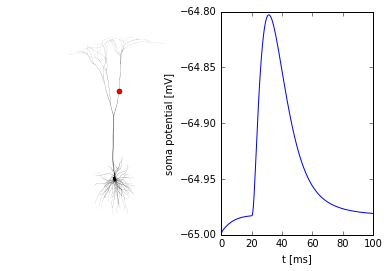

In [8]:
morphology = './cells/j4a.hoc'
#morphology = './cells/cell1.asc'
rotation = [4.99, -4.33, 3.14]
#rotation = [np.pi/2, 0,0]
slider = widgets.interact(simulate_n_plot_cell_with_synapse, morphology=fixed(morphology),
                          synapse_xpos=widgets.IntSlider(min=-200.,max=200.,step=10.,value=600.),
                          synapse_zpos=widgets.IntSlider(min=-200.,max=1400.,step=10.,value=600.),
                          syn_weight=widgets.FloatSlider(min=0.,max=.1,step=.0001,value=0.001),
                          active_soma=False,
                          stimulation_time = widgets.IntSlider(min=0.,max=80.,step=10.,value=20.),
                          rot = fixed(rotation)
                          )

**b)**
Keep the soma segment inactive. Which synapse locations and synaptic weights
will give the largest and smallest somatic responses?
Discuss with a fellow student. Use the sliders to test your hypothesis.

**c)**
By activating the soma, can you make the neuron spike? Test with the sliders.

**d)**
If you want to study a nerve cell from layer-5b in rat cortex instead (from the
article by [Hay et al. 2011](http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1002107)),
just change the morphology to the path of `cell1.asc` in the cells-folder.
(NB: You would have to change the rotation to [np.pi/2, 0, 0], to get a meaningful morphology plot.)

<!-- --- end exercise --- -->